# 결정트리
True/False 질문을 계속해서 데리터를 분류하는 것

속성들의 True/False값으로 목표변수를 예측하는 것

In [5]:
def survival_classifier(seat_belt, highway, speed, age):
    # 질문 노드: 안전 벨트를 했나요?
    if seat_belt:
        return 0  # 했으면 생존 리턴
    else:
        # 질문 노드: 사고가 고속도로였나요?
        if highway:
            # 질문 노드: 시속 100km를 넘었나요?
            if speed > 100:
                # 질문 노드: 사고자 나이가 50을 넘었나요?
                if age > 50:
                    return 1  # 사고자 나이가 50을 넘었으면 사망 리턴
                else:
                    return 0  # 사고자 나이가 50을 넘지 않았다면 생존 리턴
            else:
                return 0  # 시속 100km를 넘지 않았다면 생존 리턴
        else:  
            return 0  # 고속도로가 아니였다면 생존 리턴

## 지니 불순도(gini impurity)
데이터 셋 안에 서로 다른 데이터들이 얼마나 섞여있는 지

지니 불순도가 낮을수록 순수함

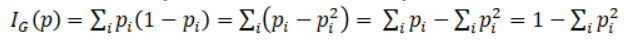

### GI_avg = (GI_left\*left  + GI_right\*right)/ total  

In [6]:
# 지니 불순도
def GI(x1, x2):
    return (1- (x1/(x1+x2))**2 - (x2/(x1+x2))**2)

In [7]:
#평균 지니 불순도
def GI_avg(l1, l2, r1, r2):
    total = r1+r2+l1+l2
    left = l1+l2
    right = r1+r2
    GI_left = GI(l1,l2)
    GI_right = GI(r1, r2)
    return round((GI_left*left + GI_right*right)/total, 3)

### 노드 중요도(Node Importance)

불순도가 얼마나 감소하는 지 앎으로 써 중요도를 판단한다.
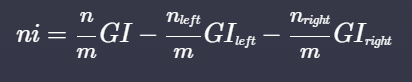

In [8]:
# 노드 중요도
def NI(n, m ,left, right, GI, GI_left, GI_right):
    return n/m*GI - left/m * GI_left - right/m * GI_right

### 속성 중요도(Feature Importance)/ 평균 지니 감소(Mean Gini decrease)

#### 질문 노드 중요도 합/ 모든 노드 중요도 합
특정 속성을 질문으로 갖는 노드들의 중요도의 평균을 구한 것과 비슷하다.

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [21]:
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns= ['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

0.9

In [25]:
importances = model.feature_importances_

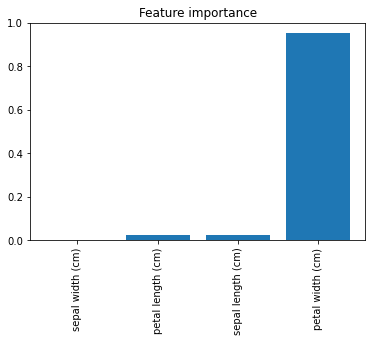

In [29]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importance")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

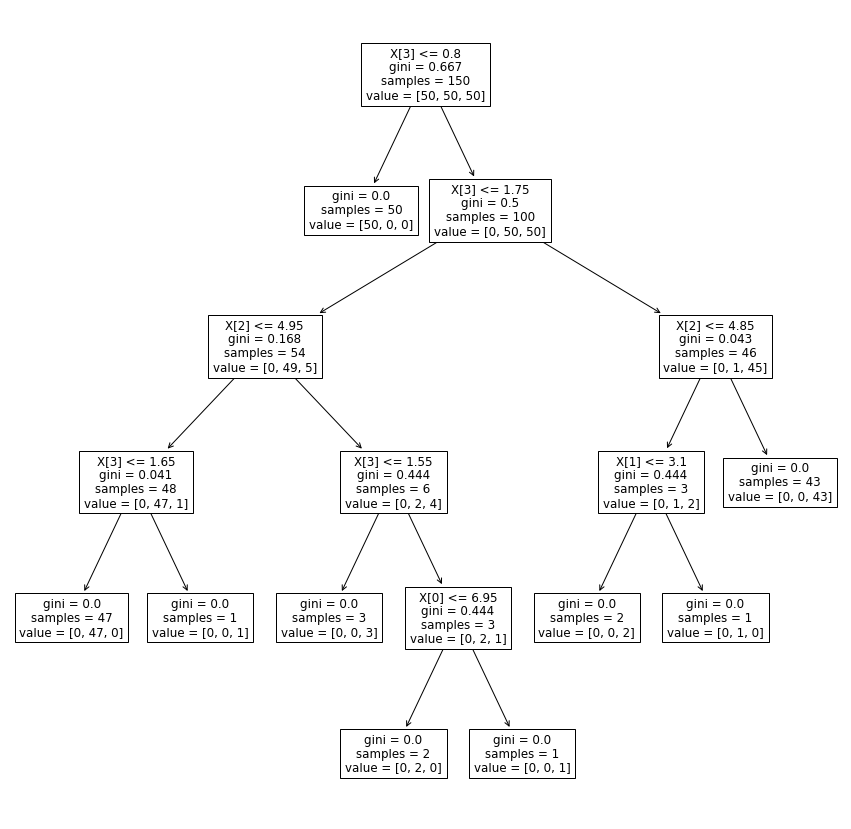

In [40]:
X, y = load_iris(return_X_y=True)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=[15, 15])
tree.plot_tree(clf)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

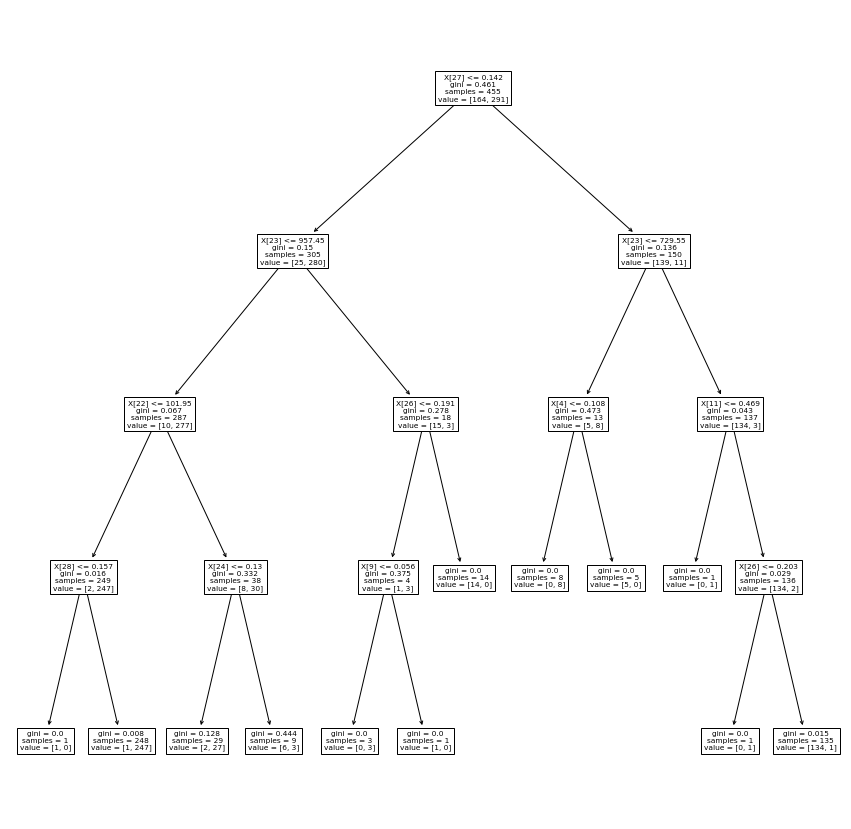

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier


# 데이터 셋 불러 오기
cancer_data = load_breast_cancer()
# 데이터 셋을 살펴보기 위한 코드
"""print(cancer_data.DESCR)"""

# 코드를 쓰세요
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns= ['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

# 실행 코드

plt.figure(figsize=[15, 15])
tree.plot_tree(model)
plt.show

### ??? 결정트리에서 분류시 질문노드들을 선정하는 방법

https://heeya-stupidbutstudying.tistory.com/41

## 결정트리에서의 random_state
https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn


